In [1]:
import argparse
import networkx as nx
import numpy as np
from scipy.sparse import linalg
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.sparse import csr_matrix
from scipy import sparse

In [2]:
def create_Laplacian_A(edgelist,n):
    W = np.zeros((n,n))
    for i,j in edgelist:
        W[i,j] = 1
        W[j,i] = 1
    D = np.diag(W.sum(axis=0))
    L = D - W
    return L

In [3]:
def create_Laplacian(edgelist,n):
    W = np.zeros((n,n))
    for i,j in edgelist:
        W[i,j] = 1
        W[j,i] = 1
    D = np.diag(W.sum(axis=0))
    L = D - W
    L = sparse.csr_matrix(L)
    return L

In [4]:
def plot_eigenvec_withL(L, p, q):
    (eigvalue, eigvec) = np.linalg.eig(L)
    sort_eigvec = eigvec[:, eigvalue.argsort()]
    vec1 = sort_eigvec[:, p-1]
    vec2 = sort_eigvec[:, q-1]
    plt.scatter(vec1, vec2)
def plot_eigenval_withL(L):
    (eigvalue, eigvec) = np.linalg.eig(L)
    n = np.size(eigvalue)
    num_eigval = np.linspace(1, n, n)
    val_eigval = np.sort(eigvalue)
    plt.plot(num_eigval, val_eigval)

In [16]:
def plot_edge(vec1, vec2, edgelist):
    for j,k in edgelist:
        plt.plot(vec1[[j,k]],vec2[[j,k]])
    plt.show()
def plot_edge_sort_sparse(sparse_vec, p, q, edgelist):
    vec1 = sparse_vec[:,p-1]
    vec2 = sparse_vec[:,q-1]
    for j,k in edgelist:
        plt.plot(vec1[[j,k]],vec2[[j,k]])
    plt.show()
def plot_edge_array_matrix(sorted_eigvec, p, q, edgelist):
    vec1 = sorted_eigvec[:, p-1]
    vec2 = sorted_eigvec[:, q-1]
    for j,k in edgelist:
        plt.plot(vec1[[j,k]],vec2[[j,k]])
    plt.show()

In [17]:
n = 10
edgelist = [[i,i+1] for i in range(n-1)]
L1 = create_Laplacian(edgelist, n)
L2 = create_Laplacian_A(edgelist, n)

In [18]:
(eigvalue, eigvec) = np.linalg.eig(L2)
sort_eigvec = eigvec[:, eigvalue.argsort()]
vec1 = sort_eigvec[:, 1]
vec2 = sort_eigvec[:, 2]
#plt.scatter(vec1, vec2)

In [19]:
vals, vecs = sparse.linalg.eigsh(L1, which = 'SM')
#eig = sparse.linalg.eigsh(L1)

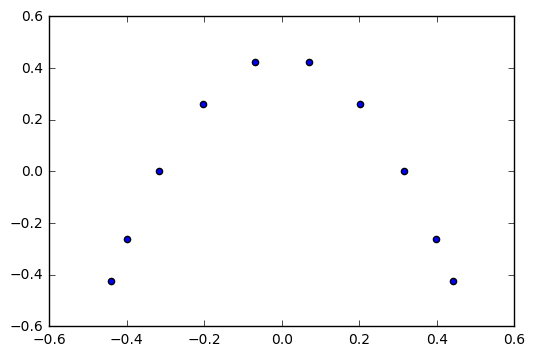

In [20]:
plt.scatter(vecs[:,1],vecs[:,2])

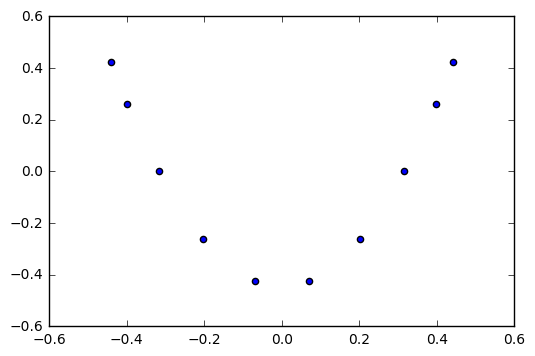

In [21]:
plot_eigenvec_withL(L2, 2, 3)

In [22]:
(eigvalue, eigvec) = np.linalg.eig(L2)
sort_eigvec = eigvec[:, eigvalue.argsort()]
vec1 = sort_eigvec[:, 2-1]
vec2 = sort_eigvec[:, 3-1]
#plt.scatter(vec1, vec2)
#plt.show()

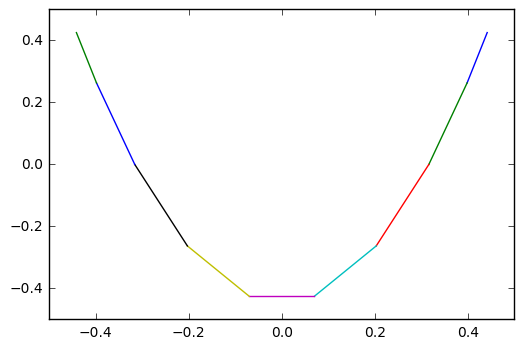

In [23]:
plot_edge_array_matrix(sort_eigvec, 2, 3, edgelist)

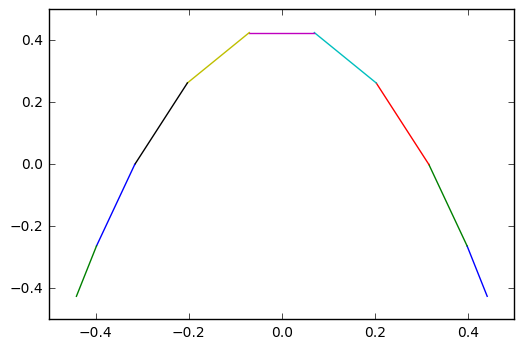

In [25]:
plot_edge_sort_sparse(vecs, 2, 3, edgelist)

In [27]:
#plot_edge_sort_sparse(vecs, 3, 2, edgelist)

In [28]:
n1 = 100
edgelist0 = [[i,i+1] for i in range(n1-1)]
L3 = create_Laplacian(edgelist0, n1)
L4 = create_Laplacian_A(edgelist0, n1)

(eigvalue, eigvec) = np.linalg.eig(L4)
sort_eigvec = eigvec[:, eigvalue.argsort()]
vec1 = sort_eigvec[:, 1]
vec2 = sort_eigvec[:, 2]

vals, vecs = sparse.linalg.eigsh(L3, which = 'SM')

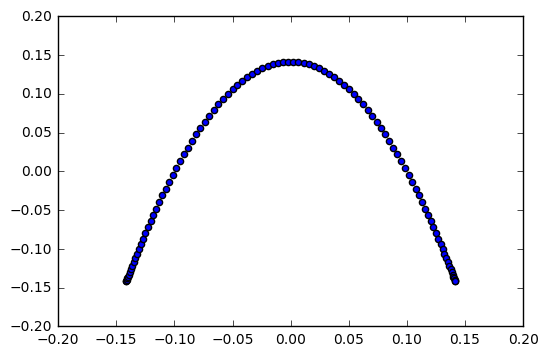

In [29]:
plot_eigenvec_withL(L4, 2, 3)

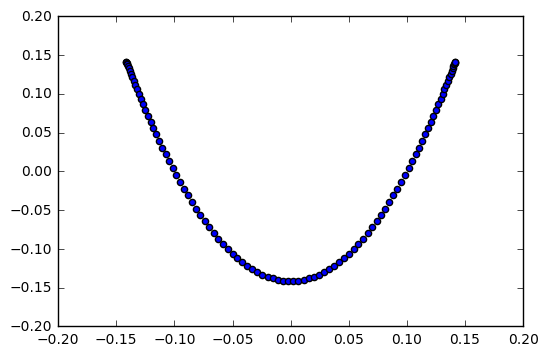

In [30]:
plt.scatter(vecs[:,1],vecs[:,2])

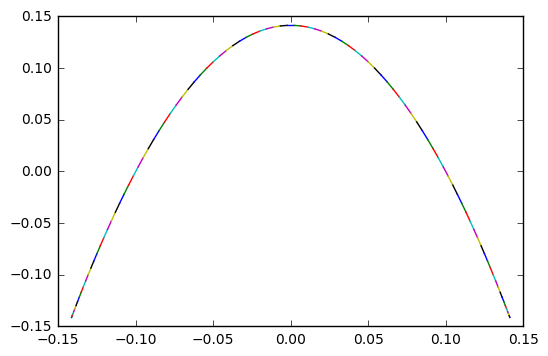

In [31]:
plot_edge_array_matrix(sort_eigvec, 2, 3, edgelist0)

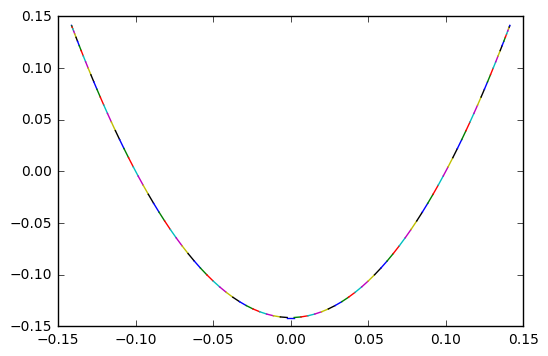

In [32]:
plot_edge_sort_sparse(vecs, 2, 3, edgelist0)

In [33]:
del edgelist0[50]

In [34]:
len(edgelist0)

98

In [35]:
L5 = create_Laplacian(edgelist0, n1)
L6 = create_Laplacian_A(edgelist0, n1)

(eigvalue, eigvec) = np.linalg.eig(L6)
sort_eigvec = eigvec[:, eigvalue.argsort()]
vec1 = sort_eigvec[:, 1]
vec2 = sort_eigvec[:, 2]

vals, vecs = sparse.linalg.eigsh(L5, which = 'SM')

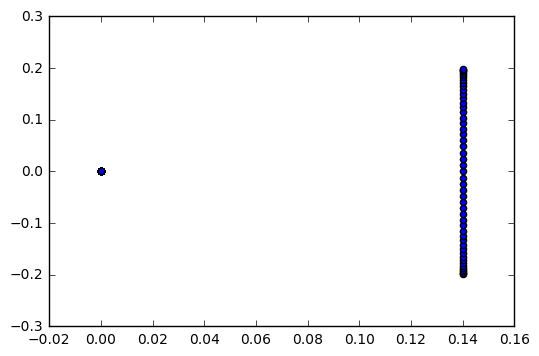

In [36]:
plot_eigenvec_withL(L6, 2, 3)

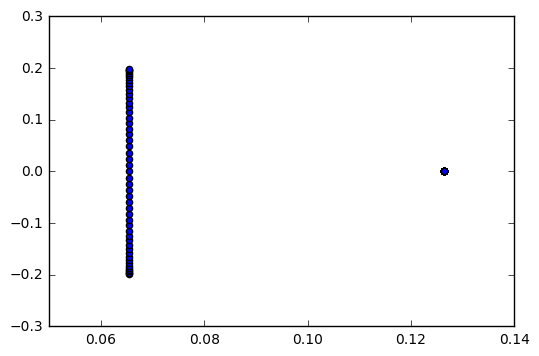

In [38]:
plt.scatter(vecs[:,1],vecs[:,2])

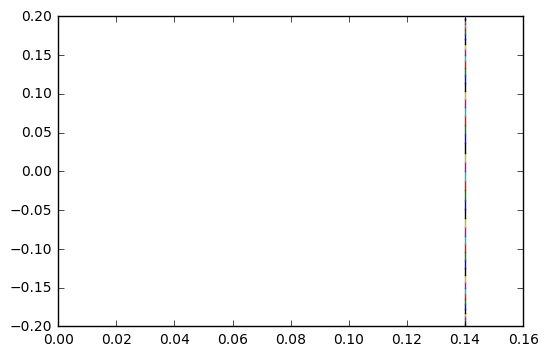

In [39]:
plot_edge_array_matrix(sort_eigvec, 2, 3, edgelist0)

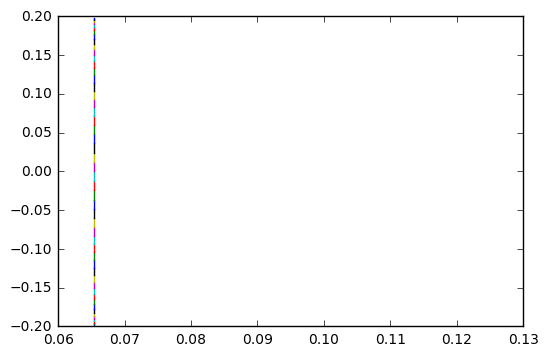

In [40]:
plot_edge_sort_sparse(vecs, 2, 3, edgelist0)